In [2]:
%display typeset

Calculando dX/dt:

In [3]:
var('X mu D t')
X = function('X')(t)
dxdt = diff(X,t) == mu*X-D*X
dxdt

diff(X(t), t) == -D*X(t) + mu*X(t)

Calculando dS/dt:

In [4]:
var('S mu D Sf X Y t')
S = function('S')(t)
dsdt = diff(S,t) == D*Sf - D*S -(mu*X/Y)
dsdt

diff(S(t), t) == D*Sf - D*S(t) - X*mu/Y

Desenvolvendo a matriz jacobiana:

In [6]:
var('S X mu D Y Sf x s')
J = jacobian([mu*x-D*x, D*Sf - D*s -(mu*x/Y)],[x,s])
J

[-D + mu       0]
[  -mu/Y      -D]

Calculando o traço (p):

In [15]:
J.trace()

-2*D + mu

Calculando o determinante (q):

In [16]:
J.det()

(D - mu)*D

Autovalores:

In [25]:
J.eigenvalues()

[-D + mu, -D]

Os autovalores são reais e distintos, já que mu != 0 (mu é taxa de crescimento específica; 1/Tempo): 

Se mu>D, os sinais dos autovalores são opostos: Equilíbrio em ponto de sela

Se mu<D, os sinais dos autovalores são iguais, nesse caso negativos, já que D é taxa de diluição e portanto não pode ser negativo: Equilíbrio pontual estável

Se mu=D, um dos autovalores será 0:.....?

Polinômio característico:

In [26]:
J.characteristic_polynomial()

x^2 + (2*D - mu)*x + D^2 - D*mu

In [20]:
p = J.trace
print(p)

q = J.det
print(q)

<built-in method trace of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6ffed0a61d50>
<built-in method det of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6ffed0a61d50>


Δ=p^2-4*q

p^2 = (mu-2D)^2 = mu^2 -4muD +4D^2
4q = 4(D^2 - muD) = 4D^2 - 4muD

Δ = mu^2 -4muD +4D^2 - (4D^2 - 4muD) = mu^2

Calculando o equilíbrio pontual do sistema:

In [28]:
var('S X mu D Y Sf x s')
xdot(x,s) = mu*x-D*x
sdot(x,s) = D*Sf - D*s -(mu*x/Y)
solve([xdot, sdot], [x,s])

[[x == 0, s == Sf]]

*-----------------------------------------------------------------------------------------------------*

'Raízes=' [x == 0]

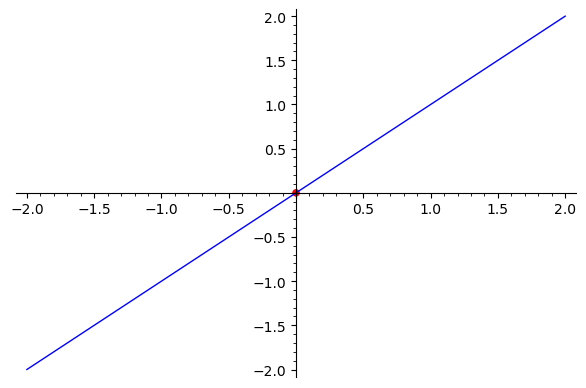

In [13]:
var('mu D')
f(x) = mu*x - D*x
raízes = solve(f,x)
show("Raízes=",raízes)
F=plot(f(mu=2, D=1),(x,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

'Raízes=' [s == (D*Sf*Y - X*mu)/(D*Y)]

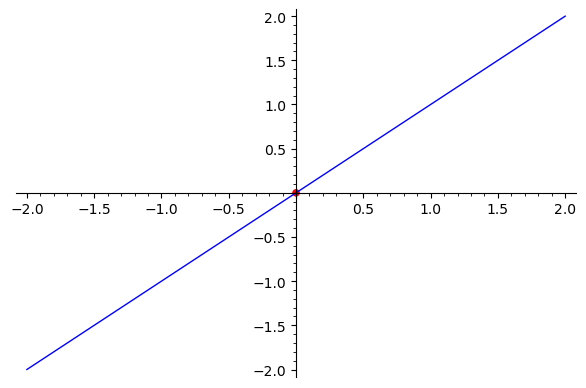

In [16]:
var('mu D Sf X Y')
f(s) = D*Sf - D*s -(mu*X/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

'Raízes=' [s == (D*Sf*Y - mu*x)/(D*Y)]

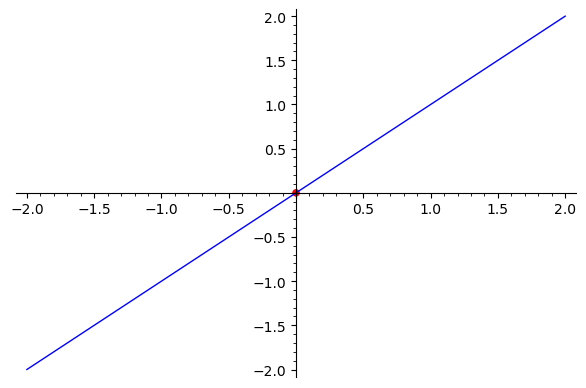

In [17]:
var('mu D Sf Y')
f(s) = D*Sf - D*s -(mu*x/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [19]:
def fun(t,y):
    x,s = y
    return [Y*(Sf-(Ks*D)/(mumax-D)),
            Ks*D/(mumax-D)]

In [27]:
'''T = ode_solver()
T.algorithm='rk8pd'
T.function = fun
y0=[1,0]
T.ode_solve(t_span=[0,10],y_0=y0, num_points=100)'''

#Verificar como resolver esse problema depois

"T = ode_solver()\nT.algorithm='rk8pd'\nT.function = fun\ny0=[1,0]\nT.ode_solve(t_span=[0,10],y_0=y0, num_points=100)"

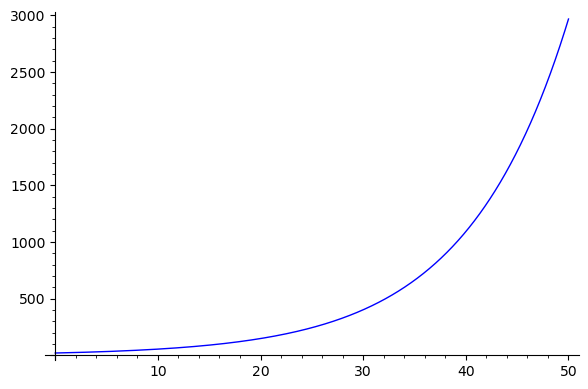

In [26]:
var('t')
mu = 0.2
D = 0.1
x0 = 20
x(t) = x0*exp((mu-D)*t)
plot(x(t),(t,0,50))